Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [16]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. Note the only difference is
# that we don't load as many ones as we load zeros.

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1][:30]
X_train = np.vstack((X_train_0, X_train_1))

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1][:30]
y_train = np.hstack((y_train_0, y_train_1))

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1][:12]
X_test = np.vstack((X_test_0, X_test_1))

y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1][:12]
y_test = np.hstack((y_test_0, y_test_1))
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(371, 256)
(371,)
(1224, 256)
(1224,)


In [4]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


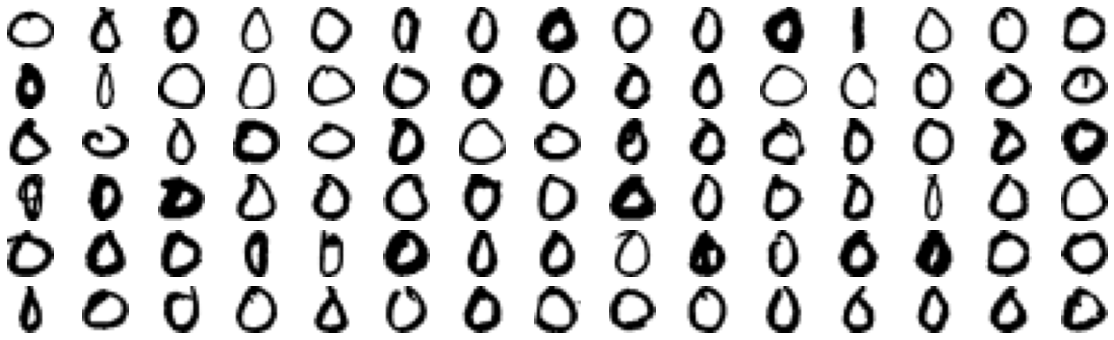

In [5]:
show_numbers(X_test)

Choose one of the classifiers you implemented and use it on the following task: Take a look at the provided notebook. It loads the ZIP-Code’s zeros and ones, but now there are manymore zeros than there are ones. We are going to believe that these digits represent geneticdata. Actually, we are virologists trying to develop a test to determine which of the data belongs to infected patients (the ones) and which do not (the zeros). Train/apply your model on the data and do the tasks of the exercise.

In [49]:
class KNearestNeighbors():
    '''
    Think about defining more functions that will help you building this algorithm.
    Optimally, one that takes in k and a test image as a parameter.
    '''
    def predict(self, X_test, k):       # As suggested, a function that takes in k and a test image as a parameter.
        predict_results = []
        for i in X_test:
            squared_distances = self.squared_euclidean_distance(self.X, i)
            indices = np.argpartition(squared_distances, k)[:k]   # get the indices of k values with smaller distances
            answer_indices = (self.y[indices])       # get the value of the label corresponding to index
            #print(answer_indices)
            list = answer_indices.tolist()           # turn numpy array into a normal list to use count
            majority = max(list, key=list.count)     # get the value with the most occurrences
            #print(majority)
            predict_results += [majority]            # add it to a result list
        return(predict_results)
                    
    def fit(self, x, y):     #fit X_train, y_train together
        self.X = x
        self.y = y
            
    def squared_euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis = 1)

    def correctness(self, right_answer, predict_result):
        return np.mean(right_answer == predict_result)
    
kNN = KNearestNeighbors()
squared_distances = kNN.squared_euclidean_distance(X_train, X_test[0])

In [50]:
kNN.fit(X_train, y_train)

prediction1 = kNN.predict(X_test, 1)     # k=1
prediction2 = kNN.predict(X_test, 2)
prediction3 = kNN.predict(X_test, 3)
prediction4 = kNN.predict(X_test, 4)
prediction5 = kNN.predict(X_test, 5)
prediction6 = kNN.predict(X_test, 6)

#print(prediction)

print(kNN.correctness(y_test, prediction1))
print(kNN.correctness(y_test, prediction2))
print(kNN.correctness(y_test, prediction3))
print(kNN.correctness(y_test, prediction4))
print(kNN.correctness(y_test, prediction5))
print(kNN.correctness(y_test, prediction6))


0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425


(90,)


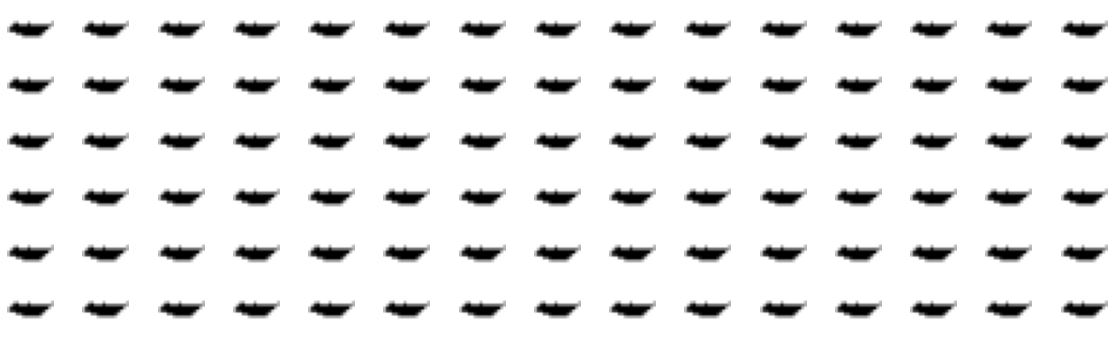

In [51]:
wrong = X_test[(prediction1 != y_test)]   # numbers that are classified incorrectly
show_numbers(wrong)

In [52]:
X_total = np.vstack((X_test, X_train))
y_total = np.hstack((y_test, y_train))

print(X_total.shape)
print(y_total.shape)

print(1595/5)

(1595, 256)
(1595,)
319.0


In [53]:
X_1 = X_total[:319]
X_2 = X_total[319:319*2]
X_3 = X_total[319*2:319*3]
X_4 = X_total[319*3:319*4]
X_5 = X_total[319*4:319*5]
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)
print(X_4.shape)
print(X_5.shape)

y_1 = y_total[:319]
y_2 = y_total[319:319*2]
y_3 = y_total[319*2:319*3]
y_4 = y_total[319*3:319*4]
y_5 = y_total[319*4:319*5]
print(y_1.shape)
print(y_2.shape)
print(y_3.shape)
print(y_4.shape)
print(y_5.shape)

(319, 256)
(319, 256)
(319, 256)
(319, 256)
(319, 256)
(319,)
(319,)
(319,)
(319,)
(319,)


In [54]:
kNN.fit(X_1, y_1)
prediction = kNN.predict(X_5, 1) 
print(kNN.correctness(y_5, prediction))

0.9059561128526645


In [48]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_model = KNeighborsClassifier(n_neighbors=1)
sklearn_model.fit(X_1, y_1)
print(sklearn_model.score(X_5, y_5))

0.9059561128526645
